# Grover's Algorithm with hierarcqal


In [1]:
import sys
sys.path.append("c:\\Users\\Amy\\Desktop\\Green_Git\\hierarqcal")


In [2]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from hierarqcal import Qinit, Qmask, Qunitary, Qpivot, Qcycle, Qunmask


## Background


Grover's algorithm provides an optimal method to amplify the amplitude of a specific state using an oracle. This specific state is usually referred to as the "target state" which we label  $T$. The oracle is a "black-box" with the ability to change the sign of amplitude of the target state, or in other words add a $\pi$ phase to its amplitude. This processes is commonly described as the marking of the target by the oracle. 

The algorithm works in two steps, namely

Step 1: Apply the oracle. 

Step 2: Reflect in a plane orthogonal to some state $\psi$. 

It turns out that step 1 and 2 are in fact the same operation, a reflection. Step 1 is a reflection in the plane orthogonal to the target state $T$, while step 2 is a reflection about some $\psi$. 

We shall see that the algorithm performs optimally if $\psi$, $T$ and the inital state of the system,  let us call this $\phi$, all lie in the same plane. 

Reflecting a vector is nothing other than changing the sign of the component of the vector parallel to the reflection axis, while doing nothing to the component of the vector perpendicular to the reflection axis.
$$U_{\text{reflection}} = \mathbb{I} - 2|n \rangle\langle n |$$



Assume that you start in some state $\phi$, which we denote in Dirac notation as $|\phi\rangle$

Applying the oracle we have
$$|\phi\rangle \rightarrow (\mathbb{I} - 2|T \rangle\langle T|)|\phi\rangle$$
Followed by a reflection about $\psi$
$$(\mathbb{I} - 2|T \rangle\langle T|)|\phi\rangle \rightarrow (\mathbb{I} - 2|\psi \rangle\langle \psi|)(\mathbb{I} - 2|T \rangle\langle T|)|\phi\rangle$$

One can visualize this process by first noticing that $|\phi\rangle$ can be separated into two components: A component lying in the plane spanned by $|T\rangle$ and $|\phi\rangle$ and a component orthogonal to this plane. 

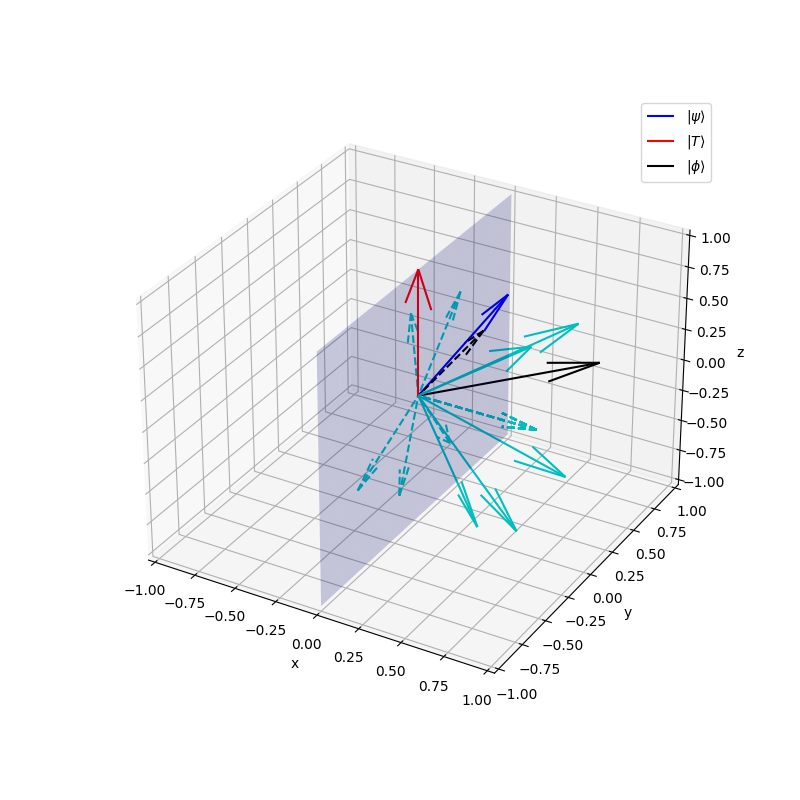

In [3]:
%matplotlib widget

A_T = []

r_psi = np.array([0, 1, 0.2])
r_psi = r_psi/np.linalg.norm(r_psi)
r_T = np.array([0, 0, 1])
r_T = r_T/np.linalg.norm(r_T)
r_phi = np.array([1, 1, 0.1])
r_phi = r_phi/np.linalg.norm(r_phi)

r_orth = np.cross(r_psi, r_T)
r_orth = -r_orth/np.linalg.norm(r_orth)

r_in_plane = r_phi - np.dot(r_orth,r_phi)*r_orth
r_out_plane = np.dot(r_orth,r_phi )*r_orth

A_T.append(np.dot(r_T,r_in_plane)**2)
alpha = np.dot(r_in_plane,r_in_plane)
theta_0 = np.arcsin(np.dot(r_in_plane/np.linalg.norm(r_in_plane),r_T))
theta = np.arcsin(np.dot(r_psi,r_T))

# plot the vectors in 3D with view angle (azimuth, elevation)
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.quiver(0, 0, 0, r_psi[0], r_psi[1], r_psi[2], color='b', label=r'$|\psi\rangle$')
ax.quiver(0, 0, 0, r_T[0], r_T[1], r_T[2], color='r', label=r'$|T\rangle$')
ax.quiver(0, 0, 0, r_phi[0], r_phi[1], r_phi[2], color='k', label=r'$|\phi\rangle$')
ax.quiver(0, 0, 0, r_in_plane[0], r_in_plane[1], r_in_plane[2], color='k',linestyle='dashed')
ax.quiver(0, 0, 0, r_out_plane[0], r_out_plane[1], r_out_plane[2], color='k',linestyle='dashed')

#plot the plane in which r_phi and r_T lie
xx, yy = np.meshgrid(np.linspace(-1, 1, 10), np.linspace(-1, 1, 10))
i = 0
while r_orth[i] == 0:
    i += 1
zz = (-r_orth[(i+1)%3]*xx - r_orth[(i+2)%3]*yy)/r_orth[i]
args = [xx, yy, zz]
args = args[-i-1:] + args[:-i-1]

ax.plot_surface(*args, alpha=0.2, color='b')

N = 5
for k in range(N):
    r_phi = r_phi - 2*np.dot(r_phi, r_T)*r_T
    r_in_plane = r_phi - np.dot(r_orth, r_phi)*r_orth
    r_out_plane = np.dot(r_phi, r_orth)*r_orth
    #ax.quiver(0, 0, 0, r_phi[0], r_phi[1], r_phi[2], color='g')
    #ax.quiver(0, 0, 0, r_in_plane[0], r_in_plane[1], r_in_plane[2], color='g',linestyle='dashed')
    #ax.quiver(0, 0, 0, r_out_plane[0], r_out_plane[1], r_out_plane[2], color='g',linestyle='dashed')

    r_phi = r_phi - 2*np.dot(r_phi, r_psi)*r_psi
    #r_phi = - r_phi
    r_in_plane = r_phi - np.dot(r_orth, r_phi)*r_orth
    r_out_plane = np.dot(r_phi, r_orth)*r_orth
    ax.quiver(0, 0, 0, r_phi[0], r_phi[1], r_phi[2], color='c')
    ax.quiver(0, 0, 0, r_in_plane[0], r_in_plane[1], r_in_plane[2], color='c',linestyle='dashed')
    ax.quiver(0, 0, 0, r_out_plane[0], r_out_plane[1], r_out_plane[2], color='c',linestyle='dashed')

    A_T.append(np.dot(r_T,r_in_plane)**2)

ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend()
plt.show()


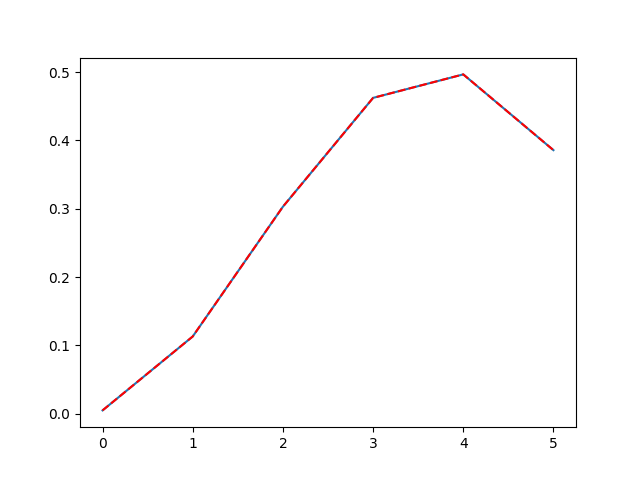

In [4]:
plt.figure()
plt.plot(range(N+1), A_T)
plt.plot(range(N+1), [alpha*np.sin(theta_0+2*i*theta)**2 for i in range(N+1)], '--r')

## Choose the number of qubits

In [5]:
n = 4
random_int = np.random.randint(0, 2**n)
Target_string = bin(random_int)[2:].zfill(n)
N_iterations = 1 #int((np.pi / 2 / np.arctan(1 / np.sqrt(2**n)) - 1) / 2)#


In [6]:
print("Number of qubits", n)
print("Number of ancillas", n - 3)
print("Total number of qubits", 2 * (n) - 3)
print("Search space size", 2**n)
print("With target", Target_string)

print("\nInteractions of Grover to perform", N_iterations)
print(
    "Optimal number of iterations",
    int((np.pi / 2 / np.arctan(1 / np.sqrt(2**n)) - 1) / 2),
)


Number of qubits 4
Number of ancillas 1
Total number of qubits 5
Search space size 16
With target 0110

Interactions of Grover to perform 1
Optimal number of iterations 2


## Create the primitive circuit with Qpivot

In [7]:
H = Qunitary("H()^0")
X = Qunitary("X()^0")

X_i = Qunitary("cp(x)^01", symbols=[np.pi / 2])
X_i_plus_X_j = Qunitary("cnot()^01;cp(x)^12;cnot()^01", symbols=[-np.pi / 2])

H_bottom = Qpivot(mapping=H, global_pattern="*1")

U_psi = Qcycle(mapping=H)
U_T = Qpivot(mapping=X, global_pattern=Target_string[::-1])

U_toffoli = Qinit(3)
U_toffoli += H_bottom
U_toffoli += Qpivot(mapping=X_i, global_pattern="*1", merge_within="*1")
U_toffoli += Qpivot(mapping=X_i_plus_X_j, global_pattern="*1", merge_within="*1")
U_toffoli += H_bottom

maskAncillas = Qmask("0" + "01" * (n - 3) + "00")
multiCZ = H_bottom + Qunmask("previous")
multiCZ += Qcycle(mapping=U_toffoli, step=2, boundary="open")
multiCZ += Qmask("*1")
multiCZ += Qcycle(mapping=U_toffoli, step=2, boundary="open", edge_order=[-1])
multiCZ += Qunmask("previous")
multiCZ += maskAncillas + H_bottom

U_reflect_0 = Qcycle(mapping=X) + multiCZ + Qcycle(mapping=X)

U_oracle = U_T + U_reflect_0 + U_T
U_defuse = U_psi + U_reflect_0 + U_psi

ancilla_str = "0" + "01" * (n - 3) + "00"
q_names = [f"q_{i}" if ancilla_str[i] == "0" else f"a_{i}" for i in range(2 * n - 3)]
U = Qinit(q_names) + maskAncillas + U_psi

if N_iterations > 0:
    U += (U_oracle + U_defuse) * N_iterations


In [8]:
# create the circuit using the chose backend
circuit = U(backend="qiskit", barriers=True)
circuit.measure_all()


## Visualize the primitive circuit

Change the value of k to convince yourself that is indeed works as intended.

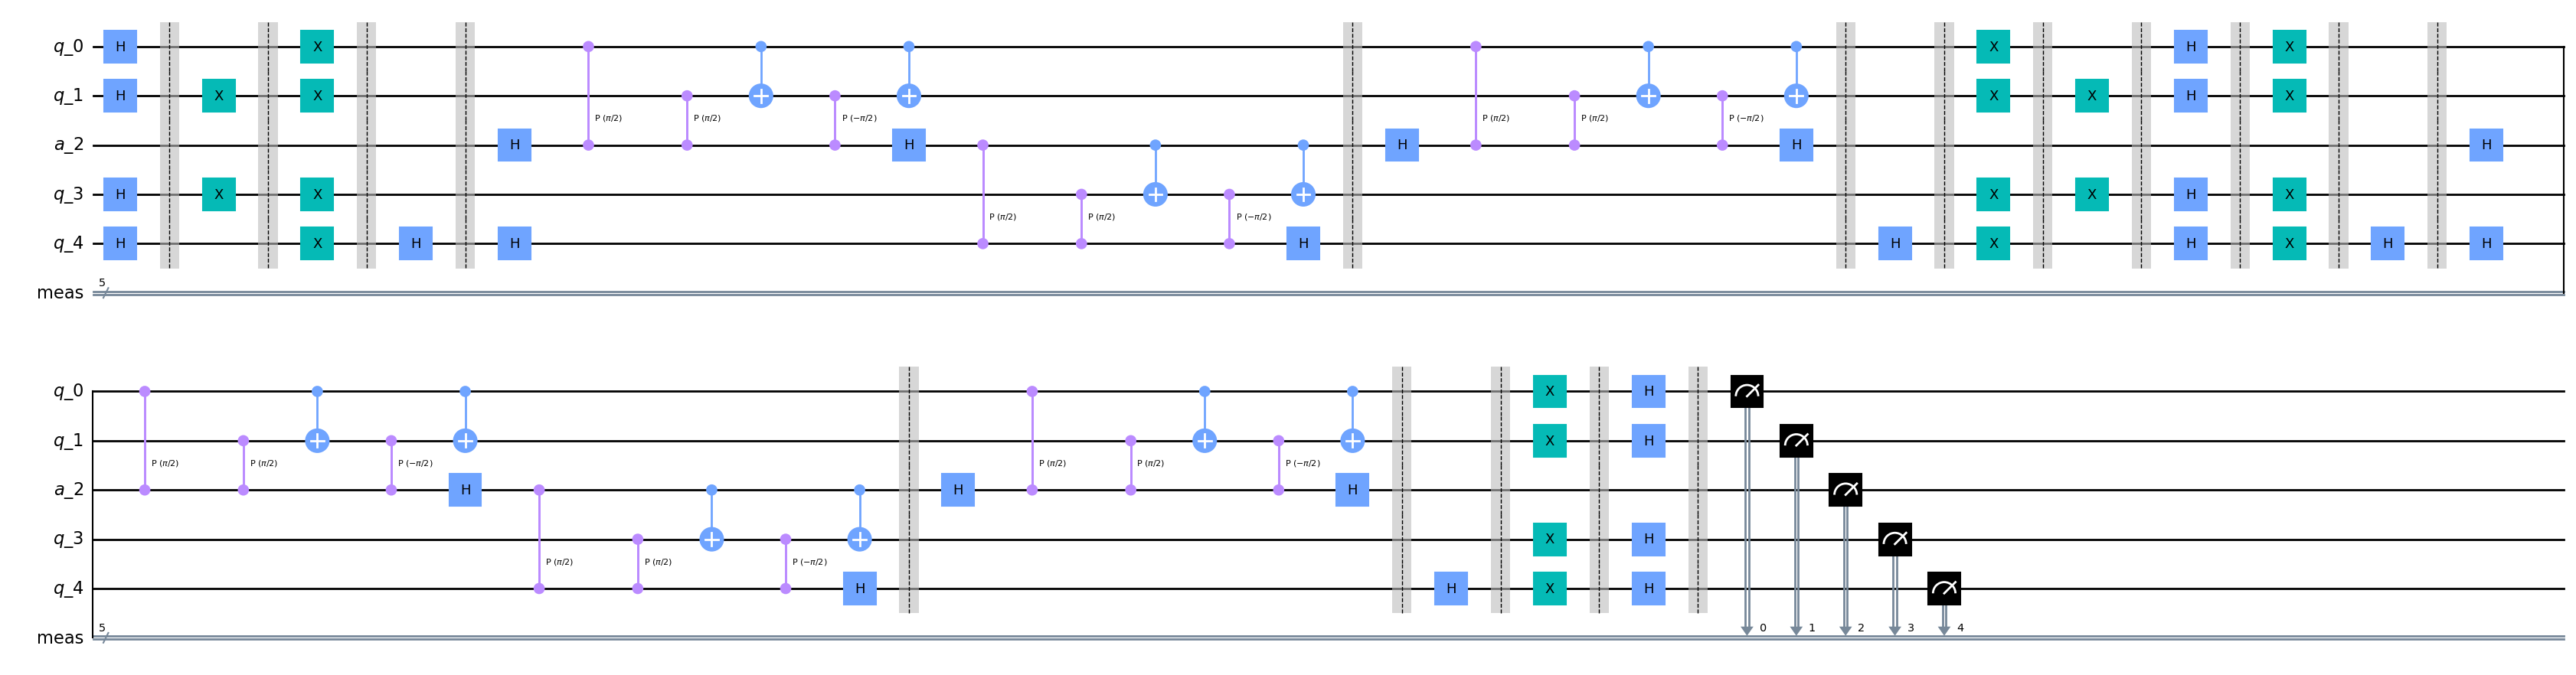

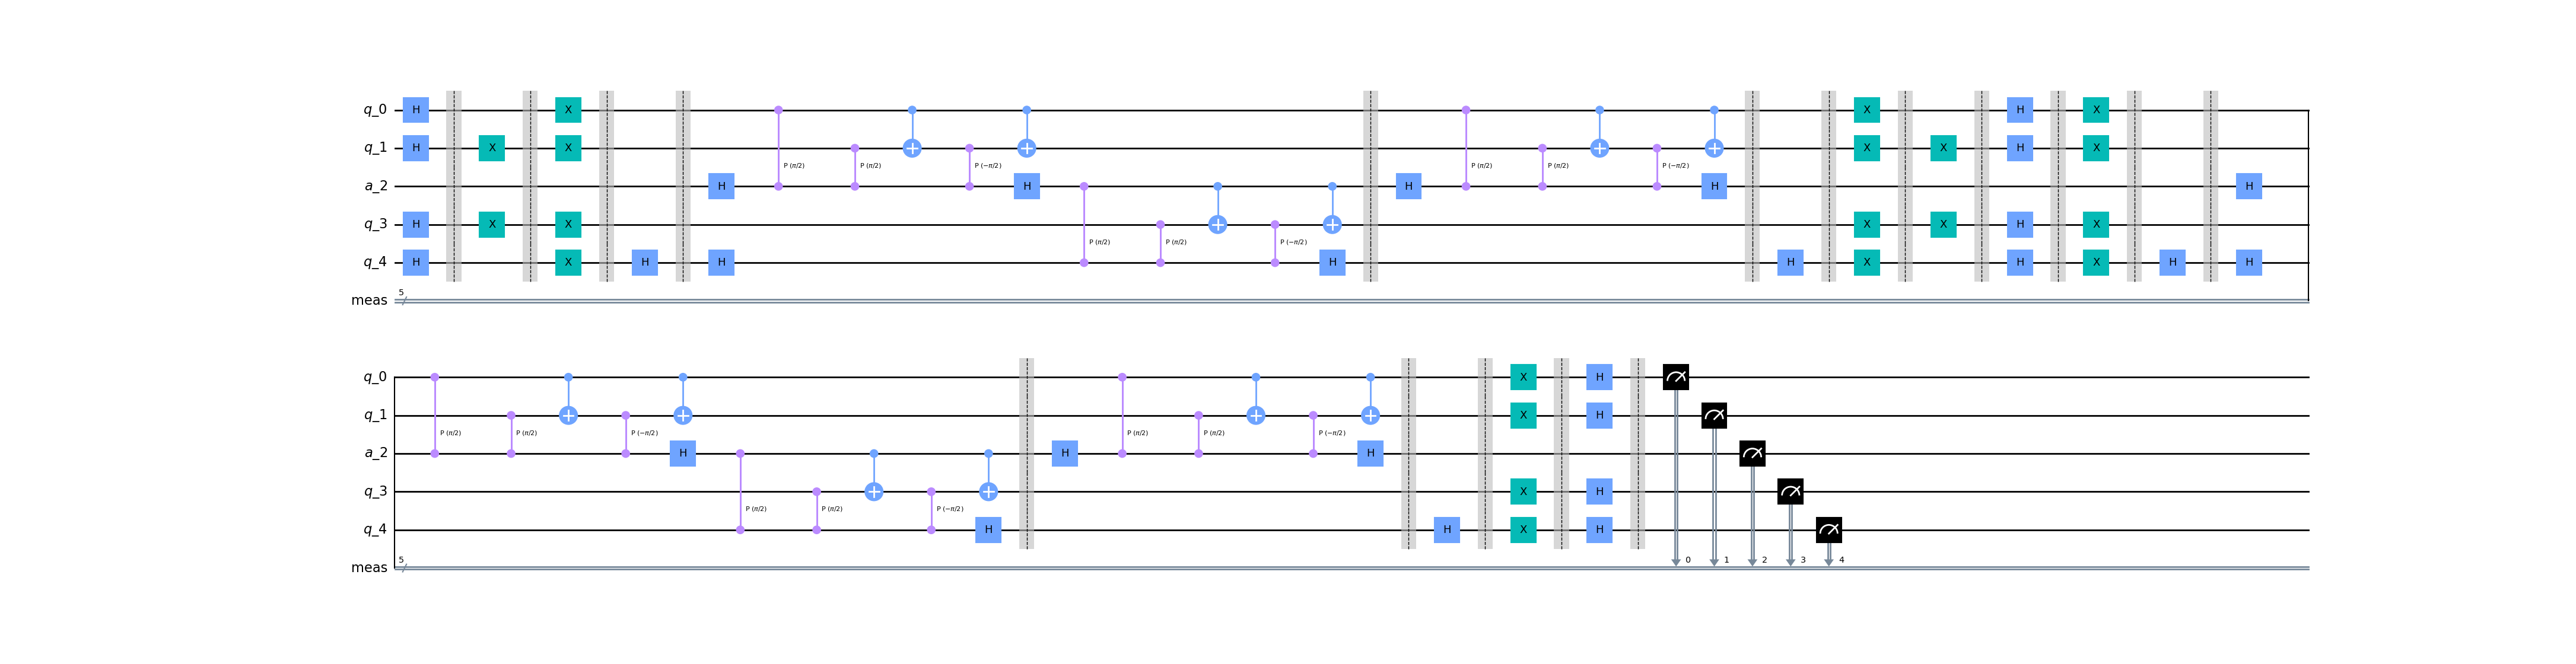

In [9]:
if N_iterations < 4:
    fig = circuit.draw("mpl", fold=50)
else:
    fig = None

fig


In [10]:
# run the circuit, get counts
from qiskit import Aer, execute
from qiskit.visualization import plot_histogram

backend = Aer.get_backend("qasm_simulator")
job = execute(circuit, backend, shots=100)
result = job.result()
counts = result.get_counts()

In [11]:
Q = []
mask = ["q" if n.split("_")[0] == "q" else "a" for n in q_names]
for k in counts.keys():
    Q.append("".join([k[i] if mask[i] == "q" else "*" for i in range(len(k))]))


In [12]:
counts_q = {}
count_keys = counts.keys()
for x in Q:
    # all binary strings of length n_a
    n_a = len(x.split("*")) - 1
    A = [[x for x in bin(i)[2:].zfill(n_a)] + [""] for i in range(2**n_a)]
    Trace_A = []
    for a in A:
        Trace_A.append("".join([x + y for x, y in zip(x.split("*"), a)]))

    counts_q[x.replace("*", "")] = sum([counts[k] for k in Trace_A if k in count_keys])


Number of qubits 4
Number of ancillas 1
Total number of qubits 5
Search space size 16
With target 0110

Interactions of Grover to perform 1
Optimal number of iterations 2

Top 5 x associate with the 5 larges value of y
['0110', '0001', '1111', '0100', '0011']
[53, 6, 5, 5, 5]


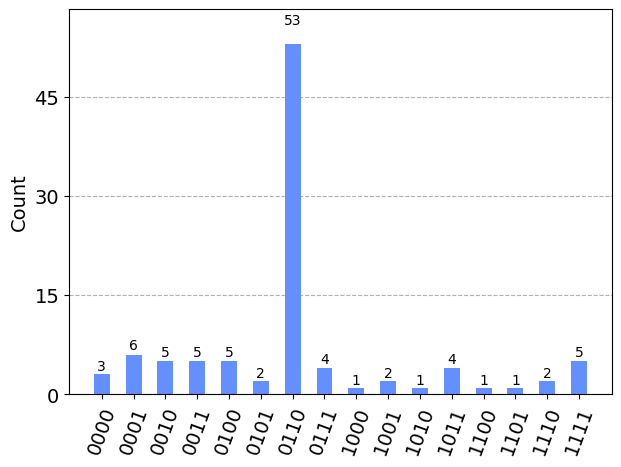

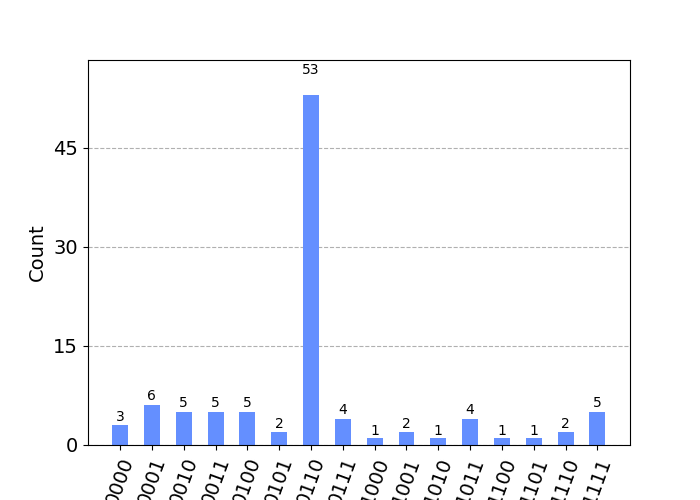

In [13]:
print("Number of qubits", n)
print("Number of ancillas", 2 * (n) - 3 - n)
print("Total number of qubits", 2 * (n) - 3)
print("Search space size", 2**n)
print("With target", Target_string)

print("\nInteractions of Grover to perform", N_iterations)
print("Optimal number of iterations", int((np.pi / 2 * np.sqrt(2**n) - 1) / 2))
print()

x = counts_q.keys()
y = counts_q.values()
# top 5 x associate with the 5 larges value of y
top_x = [x for _, x in sorted(zip(y, x), reverse=True)][:5]
top_y = sorted(y, reverse=True)[:5]

print("Top 5 x associate with the 5 larges value of y")
print(top_x)
print(top_y)

plot_histogram(counts_q)
